This notebook is a first attempt to translate the FORTRAN90 code from MTV2016 into python
and to replicate the main results of this paper.

In [13]:
import numpy as np
from scipy.stats import lognorm

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

In [1]:
#Paramters for the piece-rate version

delta = 0.000226
lamb_e = 0.7048178
k = 22.9931
sigma_z = 0.0
rhorho1 = 4.296953
rho2 = 0.065518
zlearningprob = 0.26398515
b = 2.3105359
theta9 = 0.0
theta10 = 0.0
zshockprob = 0.0093854   


#    IF (npar>=10) THEN
#    rho3=theta(9)  
#    rho4=theta(10)  
#    ELSE IF (npar==8) THEN
#    rho3=0.0_8
#    rho4=0.0_8
#    ELSE 

In [49]:
# Match shock z.
# First, populating the match productivity shock vector, if zpts_first is >1

zpts_first = 102 # basic grid
#zpts_first = np.ones((1, 100))

zpts = zpts_first

# zvector are the actual values of the match quality, dim(zpts)
# ztransmatrix is the transition matrix, dim(zpts, zpts)

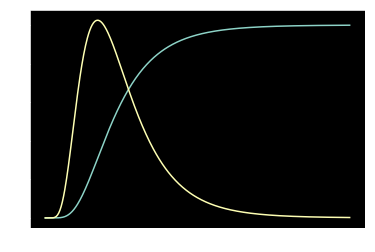

1.2372824361370023e-06

In [77]:
sigma_z = 0.5
mu_temp = np.exp(-0.5 * sigma_z**2) # this guarantess that the mean of the distribution is 1

x = np.linspace(0, 4, 500)
plt.plot(x, lognorm.cdf(x, shape, loc=0, scale=mu_temp))
plt.plot(x, lognorm.pdf(x, shape, loc=0, scale=mu_temp))
plt.show()

# print(lognorm.cdf(0.3, shape, loc=0, scale=mu_temp))
# tempreal = 0.8 * xstep * lognorm.cdf(0.3, shape, loc=0, scale=mu_temp)
# tempreal

In [79]:
# Obtain a discrete LOGNORMAL probability distr for z

zprobcdf = np.empty((zpts))
zprobpdf = np.empty((zpts))
zvector = np.empty((zpts))

sigma_z = 0.5 # CHANGE OF PARAMTER: sigma_z must be positive
mu_temp = np.exp(-0.5 * sigma_z**2) # mean of the lognormal distr, s.t. mean of the distr is 1
binsize = 1 / (zpts - 1) # binsize

resolution = 10000
xstep = 1 / resolution # keep stepping, Resolution should be much higher than no. of bins (resolution=10000)

xvalue = xstep # move along the interval of z's, starting close to 1
tempreal = 0.8 * xstep * lognorm.cdf(xvalue, shape, loc=0, scale=mu_temp) # this value is used to weight the z-values
# properly within the bin
bincounter = 1 # start with the first bin

# zprobcdf contains the probabilities of the idiosyncratic shock, dim zpts

# First fill all but the last coordinate
for bincounter in range(1, zpts):
    if lognorm.cdf(xvalue, shape, loc=0, scale=mu_temp) >= (bincounter * binsize): # if the bin is full..
        zprobcdf[bincounter - 1] = lognorm.cdf(xvalue, shape, loc=0, scale=mu_temp) # add to the cdf
        if bincounter == 1:
            zprobpdf[bincounter - 1] = zprobcdf[bincounter - 1]
            zvector[bincounter - 1] = tempreal / zprobpdf[bincounter - 1]
        else:
            zprobpdf[bincounter - 1] = zprobcdf[bincounter - 1] - zprobcdf[bincounter - 2]
            zvector[bincounter - 1] = tempreal / zprobpdf[bincounter - 1]
        
        tempreal = 0 # reset the average counter 
        bincounter += 1
        
        while lognorm.cdf(xvalue, shape, loc=0, scale=mu_temp) >= (bincounter * binsize):
            zvector[bincounter - 1] = xstep
            zprobcdf[bincounter - 1] = lognorm.cdf(xvalue, shape, loc=0, scale=mu_temp)
            zprobpdf[bincounter - 1] = 0
            bincounter += 1
            
    else:
        xvalue = xvalue + xstep
        tempreal = tempreal + (xvalue - 0.5 * xstep) * (lognorm.cdf(xvalue, shape, loc=0, scale=mu_temp) \
                                                        - lognorm.cdf(xvalue - xstep, shape, loc=0, scale=mu_temp))

In [ ]:
# Obtain a discrete LOGNORMAL probability distr for z

sigma_z = 0.2 # CHANGE OF PARAMTER: sigma_z must be positive
mu_temp = -0.5 * sigma_z**2 # mean of the lognormal distr, s.t. mean of the distr is 1
binsize = 1 / (zpts - 1) # binsize

resolution = 10000
xstep = 1 / resolution # keep stepping, Resolution should be much higher than no. of bins (resolution=10000)

# lnorm(xvalue, mu_temp, sigma_z) has the python equivalent lognorm.cdf(xvalue, sigma_z, loc=mu_temp)

xvalue = xstep # move along the interval of z's, starting close to 1
tempreal = 0.8 * xstep * lnorm(xvalue, mu_temp, sigma_z) # this value is used to weight the z-values
# properly within the bin
bincounter = 1 # start with the first bin

# zprobcdf contains the probabilities of the idiosyncratic shock, dim zpts

# First fill all but the last coordinate
for bincounter in range(1, zpts):
    if lnorm(xvalue, mu_temp, sigma_z) >= (bincounter * binsize): # if the bin is full..
        zprobcdf(bincounter) = lnorm(xvalue, mu_temp, sigma_z) # add to the cdf
        if bincounter == 1:
            zprobpdf(bincounter) = zprobcdf(bincounter)
            zvector(bincounter) = tempreal / zprobpdf(bincounter)
        else if bincounter > 1:
            zprobpdf(bincounter) = zprobcdf(bincounter) - zprobcdf(bincounter - 1)
            zvector(bincounter) = tempreal / zprobpdf(bincounter)
        
        tempreal = 0 # reset the average counter 
        bincounter += 1
        
        while lnorm(xvalue, mu_temp, sigma_z) >= (bincounter * binsize):
            zvector(bincounter) = xstep
            zprobcdf(bincounter) = lnorm(xvalue, mu_temp, sigma_z)
            zprobpdf(bincounter) = 0
            bincounter += 1
            
    else:
        xvalue = xvalue + xstep
        tempreal = tempreal + (xvalue - 0.5 * xstep) * (lnorm(xvalue, mu_temp, sigma_z) - lnorm(xvalue - xstep, mu_temp, sigma_z))
        

# last gridpoint
tempreal = 0
xstep = xvalue / (zpts * 5)

counter1 = 1
while counter1 < 11:
    xvalue = xvalue + xstep
    tempreal = tempreal + (xvalue - 0.5 * xstep) * (lnorm(xvalue, mu_temp, sigma_z) - lnorm(xvalue - xstep, mu_temp, sigma_z))
    counter1 += 1
    
zvector(zpts - 1) = tempreal / ((lnorm(xvalue, mu_temp, sigma_z) - zprobcdf(zpts - 2))
zprobcdf(zpts - 1) = 1
zprobpdf(zpts - 1) = 1 - zprobcdf(zpts - 2)

In [ ]:
# UNIFORM distr of z shocks

tempreal = 1 / (zpts - 1)
zprobpdf(2:zpts) = tempreal

tempreal2 = 1 / (zpts - 2)
zvector = 0.5 
zprobcdf(2) = zprobpdf(2)

for zcnt in range(3, zpts+1):
    zvector(zctn) = zvector(zctn - 1) + tempreal2
    zprobcdf(zctn) = zprobcdf(zctn - 1) + tempreal
    zctn += 1